In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import numpy as np

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

In [3]:
font_path = "../util/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

### 1. 주어진 csv파일은 공공데이터에서 다운로드 받은 지하철 승하차 데이터입니다. 
- 첫번째 실습은 12개의(1월~12월) 데이터를 하나의 아래처럼 하나의 DataFrame으로 만들어주세요(아래 DataFrame의 컬럼리스트)

In [4]:
col = ['날짜', '역명', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11', '11~12', '12~13',
       '13~14', '14~15', '15~16', '16~17', '17~18', '18~19', '19~20', '20~21', '21~22', '22~23', '23~24',
       '00~01', '01~02'] 

In [5]:
month1 = ["01", "02", "03", "04", "05"]

df1_list = []
for x in month1:
    df = pd.read_csv("../data/Subway/Subway_2016{}.csv".format(x), encoding='euc-kr')
    df1_list.append(df)
    
df_1 = pd.concat(df1_list)

df_1 = df_1[['날짜','역명', '구 분', '05 ~ 06', '06 ~ 07',
       '07 ~ 08', '08 ~ 09', '09 ~ 10', '10 ~ 11', '11 ~ 12', '12 ~ 13',
       '13 ~ 14', '14 ~ 15', '15 ~ 16', '16 ~ 17', '17 ~ 18', '18 ~ 19',
       '19 ~ 20', '20 ~ 21', '21 ~ 22', '22 ~ 23', '23 ~ 24', '00 ~ 01',
       '01 ~ 02']]

df_1.columns = col
df_1 = df_1.groupby(['날짜','역명', '구분']).sum().reset_index()

In [6]:
df_1.shape

(36176, 24)

In [7]:
month2 = ["06", "07", "08", "09", "10","11"]

df2_list = []
for x in month2:
    df = pd.read_csv("../data/Subway/Subway_2016{}.csv".format(x), encoding='euc-kr')
    df2_list.append(df)
    
df_2 = pd.concat(df2_list)

df_2 = df_2[['날짜','역명', '구분', '05~06', '06~07', '07~08', '08~09', '09~10', '10~11',
       '11~12', '12~13', '13~14', '14~15', '15~16', '16~17', '17~18', '18~19',
       '19~20', '20~21', '21~22', '22~23', '23~24', '00~01', '01~02']]

df_2.columns = col
df_2 = df_2.groupby(['날짜','역명', '구분']).sum().reset_index()

In [8]:
df_2.shape

(43554, 24)

In [9]:
df_3 = pd.read_csv("../data/Subway/Subway_201612.csv".format(x), encoding='euc-kr')
df_3 = df_3 [['날짜', '역명', '구분', '05~06시', '06~07시', '07~08시', '08~09시', '09~10시',
       '10~11시', '11~12시', '12~13시', '13~14시', '14~15시', '15~16시', '16~17시',
       '17~18시', '18~19시', '19~20시', '20~21시', '21~22시', '22~23시', '23~24시',
       '00~01시', '01~02시']]

df_3.columns = col
df_3 = df_3.groupby(['날짜','역명', '구분']).sum().reset_index()

In [10]:
df_3.shape

(7378, 24)

In [11]:
df_subway = pd.concat([df_1, df_2, df_3])

In [12]:
df_subway.head()

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
0,2016-01-01,가락시장(340),승차,72,102,78,145,165,173,226,...,274,253,230,124,166,165,138,35,2,0
1,2016-01-01,가락시장(340),하차,6,81,65,116,121,143,167,...,232,237,206,181,151,134,153,151,15,0
2,2016-01-01,강남(222),승차,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
3,2016-01-01,강남(222),하차,174,757,765,1201,1984,1741,1836,...,3376,3683,3616,2853,2164,1820,1526,1036,2,0
4,2016-01-01,강변(214),승차,407,365,434,838,1369,1975,2239,...,2465,2575,2129,1946,2032,1764,1444,599,0,0


In [13]:
df_subway.shape

(87108, 24)

In [14]:
df_subway.isnull().sum()

날짜       0
역명       0
구분       0
05~06    0
06~07    0
        ..
21~22    0
22~23    0
23~24    0
00~01    0
01~02    0
Length: 24, dtype: int64

## 2. 1월 ~ 12월 하나의 DataFrame에는 아래와 같이 같은 역이지만 다른 이름을 가진 역들이 있습니다.(예를 들어 153은 1호선, 319는 3호선)  
- 역명에서 숫자를 제외한 역의 이름만 추출하여 역명 컬럼에 저장하고 중복되는 역명은 하나의 역명으로 합쳐주세요.

In [15]:
df_subway2 = df_subway.copy()
df_subway2['역명'] = df_subway['역명'].apply(lambda x : x.split("(")[0])

In [16]:
df_subway2 = df_subway2.groupby(['역명']).sum()

In [17]:
for i in df_subway2.index :
    df_subway2['counts'] = df_subway2.loc[i].sum()

df_subway2.drop(df_subway2.columns[:-1], axis = 1, inplace = True)

df_subway2

,counts
역명,
가락시장,2193640583
강남,2193640583
강변,2193640583
건대입구,2193640583
경복궁,2193640583
...,...
합정,2193640583
혜화,2193640583
홍대입구,2193640583


## 3. 1번의 DataFrame에서 강남역 데이터만 추출하여 새로운 DataFrame으로 만들어주세요.
- 월별 시간대별 승하철 합계 값, 월별 총 합계 값 

In [18]:
df_subway3 = df_subway.copy()
df_subway3['역명'] = df_subway['역명'].apply(lambda x : x.split("(")[0])

In [19]:
df_subway3 = df_subway3[df_subway3['역명'] == "강남"]

In [20]:
df_subway3['날짜'] = df_subway3['날짜'].apply(lambda x : x[:-3])

In [21]:
df_subway3.head()

,날짜,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,...,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02
2,2016-01,강남,승차,1381,1133,671,677,699,932,1048,...,2716,2951,2902,2694,2863,3734,3919,2273,0,0
3,2016-01,강남,하차,174,757,765,1201,1984,1741,1836,...,3376,3683,3616,2853,2164,1820,1526,1036,2,0
240,2016-01,강남,승차,516,698,646,903,1341,1732,2269,...,5739,6334,5294,4046,4306,5471,6194,3658,0,0
241,2016-01,강남,하차,250,829,1137,2684,4896,4152,3920,...,5195,6129,6279,4093,2939,2623,1966,1687,5,0
478,2016-01,강남,승차,734,711,590,703,1076,1092,1503,...,3972,4210,4039,3495,3855,4725,4295,2013,0,0


In [22]:
df_subway3 = df_subway3.groupby(['날짜']).sum()

In [23]:
df_subway3['total'] = df_subway3.sum(axis = 1)

In [24]:
df_subway3

,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,total
날짜,,,,,,,,,,,,,,,,,,,,,
2016-01,30688,96142,248023,452633,452117,272407,280048,309447,397211,355584,...,470177,651604,510762,332984,364889,363536,177930,31744,92,6565737
2016-02,26341,81838,215295,388182,382820,233906,238445,267631,340717,319695,...,410680,568594,459876,299324,324762,325744,160266,32063,342,5755230
2016-03,29912,96401,272901,472917,428080,257963,245185,263924,339166,316596,...,440754,646297,521556,338353,371388,377301,172793,35538,192,6308157
2016-04,29277,91237,237741,432805,401148,245302,230894,253786,321835,299191,...,401728,592325,475506,314190,340641,346534,165957,34609,263,5856535
2016-05,31472,94893,236848,439614,395280,242650,234098,254314,320833,299281,...,411638,597756,476265,321397,346068,354553,172762,35882,192,5919827
2016-06,30463,95618,238381,437429,400581,238476,232159,250864,314592,297519,...,403950,598707,459571,306612,332858,340494,167071,34612,149,5826363
2016-07,31150,103760,245736,460381,471990,281334,287233,320706,409753,365301,...,479395,681164,519332,345321,380616,388272,184992,36327,175,6788786
2016-08,29540,95131,236381,444226,428565,262546,264286,289856,366022,331524,...,451617,658900,503011,333475,359546,364889,171204,34467,229,6355968
2016-09,26719,82176,212991,390194,363317,220007,212504,234621,292936,280469,...,394633,574274,447041,294148,315085,317862,151463,32679,712,5460894


## 4. 3번에서 생성된 데이터로 아래 그래프를 그려주세요. 
- 제목, x, y 라벨, 범주, y축의 숫자에 (,) 표시   

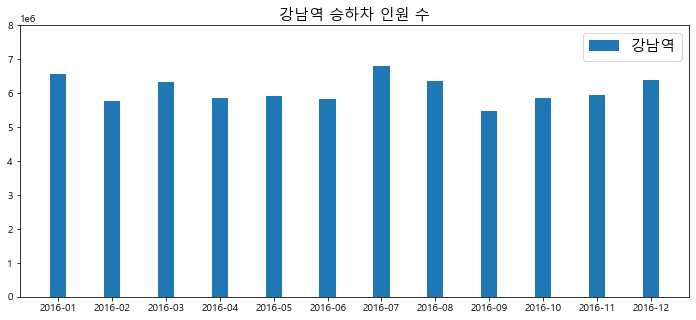

In [25]:
# 그림 사이즈 설정
plt.figure(figsize=(12,5))

# 그림 제목 설정
plt.title("강남역 승하차 인원 수",fontdict={'fontsize' : 15})

# 그래프 데이터 입력
plt.bar(df_subway3.index,df_subway3['total'], width=0.3)

# y축 범위 입력
plt.ylim(0, 8000000)

# 범례 그리기
plt.legend(labels=['강남역'], fontsize = 15)

plt.show()

## 5. 그래프에서 승차 하차를 구분해주세요.
- 제목, x, y 라벨, 범주, y축의 숫자에 (,) 표시 

In [26]:
df_subway4 = df_subway.copy()
df_subway4['역명'] = df_subway['역명'].apply(lambda x : x.split("(")[0])

df_subway4 = df_subway4[df_subway4['역명'] == "강남"]
df_subway4['날짜'] = df_subway4['날짜'].apply(lambda x : x[:-3])

In [27]:
df_subway4 = df_subway4.groupby(['날짜','구분']).sum().reset_index()
df_subway4['total'] = df_subway4.loc[:, '05~06' : '01~02'].sum(axis = 1)

In [28]:
df_subway4.head()

,날짜,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,...,17~18,18~19,19~20,20~21,21~22,22~23,23~24,00~01,01~02,total
0,2016-01,승차,17590,27844,51875,83284,73067,74155,103658,132231,...,271239,377340,286899,230055,288903,300804,137147,21622,5,3257354
1,2016-01,하차,13098,68298,196148,369349,379050,198252,176390,177216,...,198938,274264,223863,102929,75986,62732,40783,10122,87,3308383
2,2016-02,승차,14747,23675,44197,69364,62531,62826,87016,113185,...,234874,332142,258284,205446,256407,270450,124449,21620,167,2857897
3,2016-02,하차,11594,58163,171098,318818,320289,171080,151429,154446,...,175806,236452,201592,93878,68355,55294,35817,10443,175,2897333
4,2016-03,승차,15853,27861,56434,87266,74805,72631,93025,116306,...,249676,373807,288608,231532,292955,312600,132760,22824,11,3137048


In [29]:
x1 = df_subway4[df_subway4['구분'] == "승차"]
x2 = df_subway4[df_subway4['구분'] == "하차"]

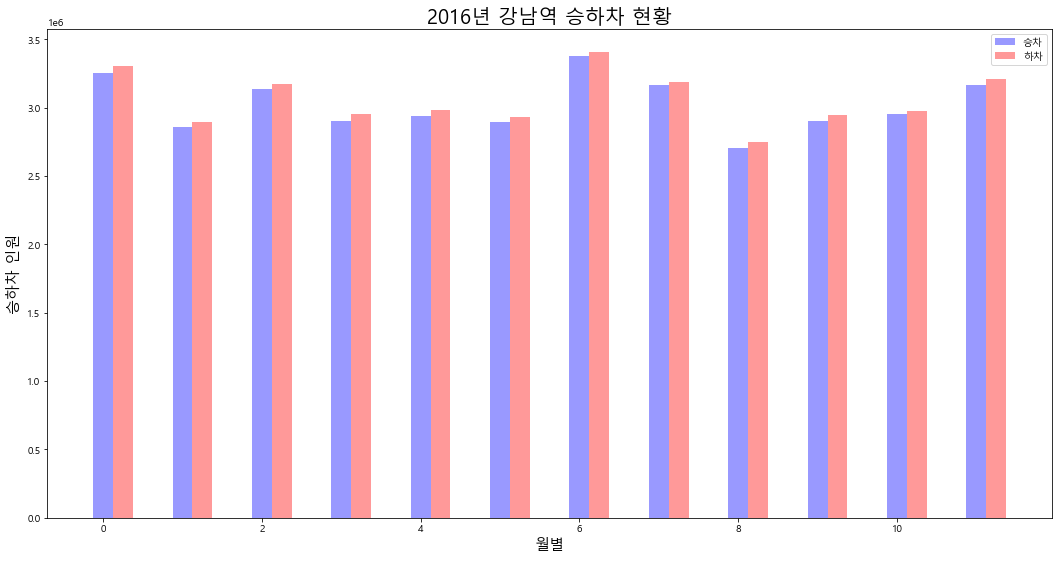

In [30]:
# 그림 사이즈 설정
fig, ax = plt.subplots(figsize  = (18, 9))
bar_width = 0.25

index = np.arange(12)

ax.bar(index, x1['total'], bar_width, alpha = 0.4, color = "blue", label = '승차')
ax.bar(index + bar_width, x2['total'], bar_width, alpha = 0.4, color = "red", label = '하차')


plt.xlabel("월별", size = 15)
plt.ylabel("승하차 인원", size = 15)
plt.title("2016년 강남역 승하차 현황", fontdict = {'fontsize' : 20})
plt.legend()
plt.show()

## 6. Data에서 가장 승차가 역이 많은 상위 15개의 데이터를 추출해주세요 

In [31]:
df_subway5 = df_subway.copy()
df_subway5['역명'] = df_subway['역명'].apply(lambda x : x.split("(")[0])

df_subway5 = df_subway5.groupby(['역명','구분']).sum().reset_index()
df_subway5['total'] = df_subway5.loc[:, '05~06' : '01~02'].sum(axis = 1)

In [32]:
df_subway5 = df_subway5[df_subway5['구분'] == '승차'][['역명','total']].sort_values(by='total', ascending=False).reset_index(drop=True)

In [33]:
df_subway5.iloc[:15,:]

,역명,total
0,강남,36262673
1,잠실,31080170
2,홍대입구,28015621
3,사당,27432213
4,서울역,27316668
5,신림,26680680
6,구로디지털단지,23104249
7,신도림,22965725
8,고속터미널,20905177
9,삼성,20538267


## 7. Data에서 승하차가 가장 많은 상위 15개의 데이터를 추출해주세요.

In [34]:
df_subway6 = df_subway.copy()
df_subway6['역명'] = df_subway['역명'].apply(lambda x : x.split("(")[0])

df_subway6 = df_subway6.groupby(['역명']).sum().reset_index()
df_subway6['total'] = df_subway6.loc[:, '05~06' : '01~02'].sum(axis = 1)

In [35]:
df_subway6 = df_subway6[['역명','total']].sort_values(by='total', ascending=False).reset_index(drop=True)

In [36]:
df_subway6.iloc[:15,:]

,역명,total
0,강남,72989920
1,잠실,59959378
2,홍대입구,57959028
3,서울역,55481511
4,사당,54818151
5,신림,52797959
6,구로디지털단지,46290426
7,신도림,45882099
8,고속터미널,42586946
9,삼성,41763727


## 8. 7번의 내용을 아래 그림처럼 그려주세요. 
- 그림에서 역명에 숫자가 있지만, 현 과제에선 하나의 역명으로..

In [37]:
df_subway7 = df_subway6.iloc[:15,:]

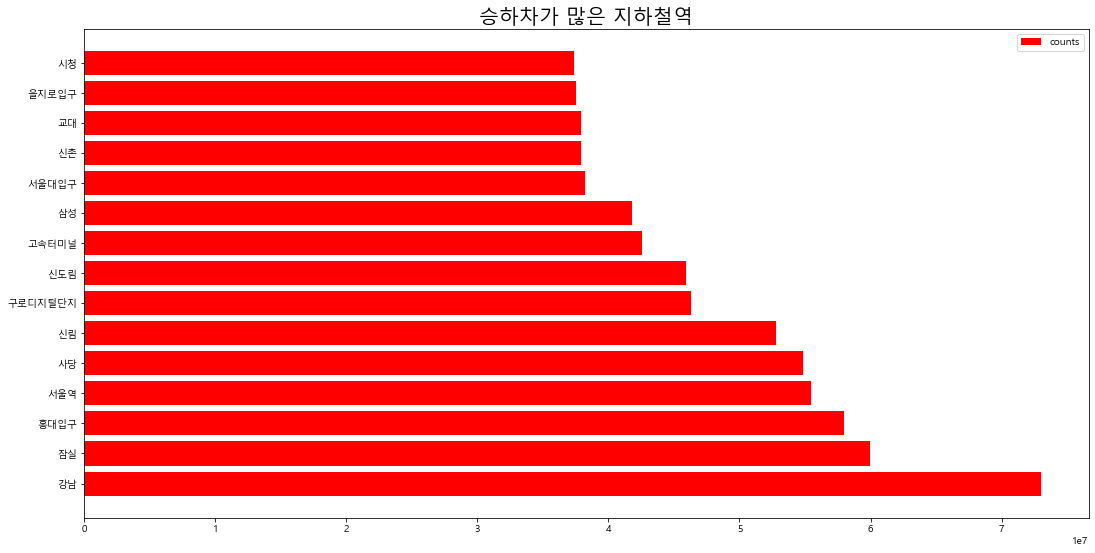

In [38]:
plt.figure(figsize = (18, 9))

plt.barh(df_subway7['역명'], df_subway7['total'], color = "red", label = "counts")
plt.title("승하차가 많은 지하철역", fontdict = {'fontsize' : 20})
plt.legend()

plt.show()